## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[256, 256, 256]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 25 # IF you feel too run to finish, try to make it smaller
BATCH_SIZE = 1024 

In [9]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau

optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]

"""Code Here
建立實驗的比較組合
"""
reduce_lr_factor = [0.9,0.5,0.1,0.01]
redice_lr_patient = [10,5,3]

In [10]:
import itertools
results = {}
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, redice_lr_patient)):
    print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patient: %i" % (i, reduce_factor, reduce_patient))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)
    
    """Code Here
    設定 reduce learning rate 的 callback function
    """
    reduce_lr = ReduceLROnPlateau(factor=reduce_factor, 
                              min_lr=1e-12, 
                              monitor='val_loss', 
                              patience=reduce_patient, 
                              verbose=1)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["acc"],
                             'valid-acc': model.history.history["val_acc"]}

Numbers of exp: 0, reduce_factor: 0.90, reduce_patient: 10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalizati

50000/50000 [==============================] - 5s 110us/step - loss: 1.3034 - acc: 0.5431 - val_loss: 1.5038 - val_acc: 0.4683
Epoch 12/25
50000/50000 [==============================] - 6s 111us/step - loss: 1.2798 - acc: 0.5517 - val_loss: 1.4903 - val_acc: 0.4706
Epoch 13/25
50000/50000 [==============================] - 6s 111us/step - loss: 1.2573 - acc: 0.5627 - val_loss: 1.4922 - val_acc: 0.4674
Epoch 14/25
50000/50000 [==============================] - 6s 112us/step - loss: 1.2358 - acc: 0.5700 - val_loss: 1.4792 - val_acc: 0.4755
Epoch 15/25
50000/50000 [==============================] - 6s 113us/step - loss: 1.2144 - acc: 0.5769 - val_loss: 1.4688 - val_acc: 0.4805
Epoch 16/25
50000/50000 [==============================] - 6s 113us/step - loss: 1.1953 - acc: 0.5833 - val_loss: 1.4692 - val_acc: 0.4803
Epoch 17/25
50000/50000 [==============================] - 6s 112us/step - loss: 1.1754 - acc: 0.5906 - val_loss: 1.4641 - val_acc: 0.4817
Epoch 18/25
50000/50000 [==============

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 7s 141us/step - loss: 2.2435 - acc: 0.2617 - val_loss: 2.1699 - val_acc: 0.3066
Epoch 2/25
50000/50000 [==============================] - 5s 109us/step - loss: 1.7833 - acc: 0.3798 - val_loss: 1.8383 - val_acc: 0.3660
Epoch 3/25
50000/50000 [==============================] - 5s 108us/step - loss: 1.6548 - acc: 0.4199 - val_loss: 1.7218 - val_acc: 0.4015
Epoch 4/25
50000/50000 [==============================] - 5s 108us/step - loss: 1.5826 - acc: 0.4462 - val_loss: 1.6657 - val_acc: 0.4141
Epoch 5/25
50000/50000 [==============================] - 5s 108us/step - loss: 1.5289 - acc: 0.4648 - val_loss: 1.6264 - val_acc: 0.4243
Epoch 6/25
50000/50000 [==============================] - 5s 110us/step - loss: 1.4872 - acc: 0.4790 - val_loss: 1.5947 - val_acc: 0.4366
Epoch 7/25
50000/50000 [==============================] - 5s 108us/step - loss: 1.4492 - acc: 0.4923 - val_loss: 1.5746 - 

Epoch 24/25
50000/50000 [==============================] - 5s 109us/step - loss: 1.1085 - acc: 0.6224 - val_loss: 1.4524 - val_acc: 0.4959
Epoch 25/25
50000/50000 [==============================] - 5s 109us/step - loss: 1.0923 - acc: 0.6265 - val_loss: 1.4558 - val_acc: 0.4925
Numbers of exp: 5, reduce_factor: 0.50, reduce_patient: 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_19 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batc

50000/50000 [==============================] - 5s 109us/step - loss: 1.3307 - acc: 0.5365 - val_loss: 1.5211 - val_acc: 0.4671
Epoch 12/25
50000/50000 [==============================] - 5s 110us/step - loss: 1.3064 - acc: 0.5438 - val_loss: 1.5048 - val_acc: 0.4713
Epoch 13/25
50000/50000 [==============================] - 5s 109us/step - loss: 1.2815 - acc: 0.5546 - val_loss: 1.5097 - val_acc: 0.4690
Epoch 14/25
50000/50000 [==============================] - 5s 109us/step - loss: 1.2615 - acc: 0.5620 - val_loss: 1.4855 - val_acc: 0.4785
Epoch 15/25
50000/50000 [==============================] - 5s 110us/step - loss: 1.2409 - acc: 0.5695 - val_loss: 1.4803 - val_acc: 0.4833
Epoch 16/25
50000/50000 [==============================] - 5s 109us/step - loss: 1.2203 - acc: 0.5771 - val_loss: 1.4839 - val_acc: 0.4801
Epoch 17/25
50000/50000 [==============================] - 6s 110us/step - loss: 1.2014 - acc: 0.5838 - val_loss: 1.4793 - val_acc: 0.4810
Epoch 18/25
50000/50000 [==============

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 8s 159us/step - loss: 2.2322 - acc: 0.2600 - val_loss: 2.0768 - val_acc: 0.3096
Epoch 2/25
50000/50000 [==============================] - 6s 116us/step - loss: 1.7762 - acc: 0.3813 - val_loss: 1.8371 - val_acc: 0.3764
Epoch 3/25
50000/50000 [==============================] - 6s 112us/step - loss: 1.6521 - acc: 0.4189 - val_loss: 1.7205 - val_acc: 0.4054
Epoch 4/25
50000/50000 [==============================] - 6s 111us/step - loss: 1.5810 - acc: 0.4449 - val_loss: 1.6672 - val_acc: 0.4152
Epoch 5/25
50000/50000 [==============================] - 6s 110us/step - loss: 1.5277 - acc: 0.4618 - val_loss: 1.6071 - val_acc: 0.4385
Epoch 6/25
50000/50000 [==============================] - 5s 110us/step - loss: 1.4829 - acc: 0.4787 - val_loss: 1.5808 - val_acc: 0.4487
Epoch 7/25
50000/50000 [==============================] - 6s 110us/step - loss: 1.4482 - acc: 0.4894 - val_loss: 1.5715 - 

50000/50000 [==============================] - 6s 110us/step - loss: 1.5916 - acc: 0.4442 - val_loss: 1.6981 - val_acc: 0.4067
Epoch 24/25
50000/50000 [==============================] - 6s 110us/step - loss: 1.5820 - acc: 0.4484 - val_loss: 1.6931 - val_acc: 0.4067
Epoch 25/25
50000/50000 [==============================] - 5s 110us/step - loss: 1.5728 - acc: 0.4518 - val_loss: 1.6866 - val_acc: 0.4111
Numbers of exp: 10, reduce_factor: 0.01, reduce_patient: 5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_34 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_l

50000/50000 [==============================] - 6s 111us/step - loss: 1.7828 - acc: 0.3815 - val_loss: 1.8332 - val_acc: 0.3627
Epoch 11/25
50000/50000 [==============================] - 6s 112us/step - loss: 1.7605 - acc: 0.3890 - val_loss: 1.8141 - val_acc: 0.3704
Epoch 12/25
50000/50000 [==============================] - 6s 111us/step - loss: 1.7395 - acc: 0.3953 - val_loss: 1.7974 - val_acc: 0.3745
Epoch 13/25
50000/50000 [==============================] - 6s 111us/step - loss: 1.7205 - acc: 0.4034 - val_loss: 1.7851 - val_acc: 0.3778
Epoch 14/25
50000/50000 [==============================] - 6s 111us/step - loss: 1.7043 - acc: 0.4076 - val_loss: 1.7706 - val_acc: 0.3827
Epoch 15/25
50000/50000 [==============================] - 6s 111us/step - loss: 1.6889 - acc: 0.4118 - val_loss: 1.7600 - val_acc: 0.3873
Epoch 16/25
50000/50000 [==============================] - 6s 111us/step - loss: 1.6734 - acc: 0.4182 - val_loss: 1.7491 - val_acc: 0.3905
Epoch 17/25
50000/50000 [==============

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 9s 172us/step - loss: 1.8009 - acc: 0.3675 - val_loss: 1.8286 - val_acc: 0.3717
Epoch 2/25
50000/50000 [==============================] - 6s 116us/step - loss: 1.5401 - acc: 0.4529 - val_loss: 1.6822 - val_acc: 0.3946
Epoch 3/25
50000/50000 [==============================] - 6s 116us/step - loss: 1.4478 - acc: 0.4848 - val_loss: 1.6368 - val_acc: 0.4228
Epoch 4/25
50000/50000 [==============================] - 6s 128us/step - loss: 1.3719 - acc: 0.5115 - val_loss: 1.5744 - val_acc: 0.4359
Epoch 5/25
50000/50000 [==============================] - 6s 124us/step - loss: 1.3106 - acc: 0.5343 - val_loss: 1.5375 - val_acc: 0.4544
Epoch 6/25
50000/50000 [==============================] - 6s 123us/step - loss: 1.2620 - acc: 0.5530 - val_loss: 1.5888 - val_acc: 0.4306
Epoch 7/25
50000/50000 [==============================] - 6s 125us/step - loss: 1.2167 - acc: 0.5679 - val_loss: 1.6061 - 

50000/50000 [==============================] - 6s 115us/step - loss: 0.7259 - acc: 0.7492 - val_loss: 1.5426 - val_acc: 0.4934
Epoch 21/25
50000/50000 [==============================] - 6s 115us/step - loss: 0.6969 - acc: 0.7629 - val_loss: 1.4805 - val_acc: 0.5114
Epoch 22/25
50000/50000 [==============================] - 6s 115us/step - loss: 0.6706 - acc: 0.7722 - val_loss: 1.5828 - val_acc: 0.5024

Epoch 00022: ReduceLROnPlateau reducing learning rate to 0.00038742052274756136.
Epoch 23/25
50000/50000 [==============================] - 6s 115us/step - loss: 0.6406 - acc: 0.7826 - val_loss: 1.5557 - val_acc: 0.5087
Epoch 24/25
50000/50000 [==============================] - 6s 114us/step - loss: 0.6151 - acc: 0.7945 - val_loss: 1.5542 - val_acc: 0.5055
Epoch 25/25
50000/50000 [==============================] - 6s 115us/step - loss: 0.5900 - acc: 0.8038 - val_loss: 1.5513 - val_acc: 0.5189

Epoch 00025: ReduceLROnPlateau reducing learning rate to 0.0003486784757114947.
Numbers of exp:

Epoch 6/25
50000/50000 [==============================] - 6s 118us/step - loss: 1.1925 - acc: 0.5833 - val_loss: 1.5321 - val_acc: 0.4563
Epoch 7/25
50000/50000 [==============================] - 6s 117us/step - loss: 1.1461 - acc: 0.6004 - val_loss: 1.5381 - val_acc: 0.4575
Epoch 8/25
50000/50000 [==============================] - 6s 117us/step - loss: 1.1015 - acc: 0.6176 - val_loss: 1.4651 - val_acc: 0.4832
Epoch 9/25
50000/50000 [==============================] - 6s 116us/step - loss: 1.0648 - acc: 0.6315 - val_loss: 1.4493 - val_acc: 0.4889
Epoch 10/25
50000/50000 [==============================] - 6s 117us/step - loss: 1.0237 - acc: 0.6469 - val_loss: 1.5258 - val_acc: 0.4664
Epoch 11/25
50000/50000 [==============================] - 6s 116us/step - loss: 0.9941 - acc: 0.6565 - val_loss: 1.4682 - val_acc: 0.4894
Epoch 12/25
50000/50000 [==============================] - 6s 117us/step - loss: 0.9560 - acc: 0.6727 - val_loss: 1.4625 - val_acc: 0.4959
Epoch 13/25
50000/50000 [======

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 9s 186us/step - loss: 1.9291 - acc: 0.3440 - val_loss: 2.0714 - val_acc: 0.3364
Epoch 2/25
50000/50000 [==============================] - 6s 119us/step - loss: 1.5798 - acc: 0.4474 - val_loss: 1.7387 - val_acc: 0.3926
Epoch 3/25
50000/50000 [==============================] - 6s 120us/step - loss: 1.4836 - acc: 0.4813 - val_loss: 1.5890 - val_acc: 0.4411
Epoch 4/25
50000/50000 [==============================] - 6s 119us/step - loss: 1.4191 - acc: 0.5069 - val_loss: 1.6034 - val_acc: 0.4356
Epoch 5/25
50000/50000 [==============================] - 6s 118us/step - loss: 1.3703 - acc: 0.5238 - val_loss: 1.5677 - val_acc: 0.4441
Epoch 6/25
50000/50000 [==============================] - 6s 118us/step - loss: 1.3347 - acc: 0.5363 - val_loss: 1.5211 - val_acc: 0.4633
Epoch 7/25
50000/50000 [==============================] - 6s 118us/step - loss: 1.2987 - acc: 0.5491 - val_loss: 1.5091 - 

Epoch 24/25
50000/50000 [==============================] - 6s 119us/step - loss: 0.9829 - acc: 0.6685 - val_loss: 1.4169 - val_acc: 0.5062

Epoch 00024: ReduceLROnPlateau reducing learning rate to 4.358480873634108e-06.
Epoch 25/25
50000/50000 [==============================] - 6s 119us/step - loss: 0.9550 - acc: 0.6812 - val_loss: 1.3987 - val_acc: 0.5116
Numbers of exp: 20, reduce_factor: 0.10, reduce_patient: 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_64 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)              

Epoch 11/25
50000/50000 [==============================] - 6s 121us/step - loss: 1.6997 - acc: 0.4074 - val_loss: 1.7673 - val_acc: 0.3878
Epoch 12/25
50000/50000 [==============================] - 6s 119us/step - loss: 1.6846 - acc: 0.4133 - val_loss: 1.7568 - val_acc: 0.3916
Epoch 13/25
50000/50000 [==============================] - 6s 120us/step - loss: 1.6714 - acc: 0.4181 - val_loss: 1.7436 - val_acc: 0.3935
Epoch 14/25
50000/50000 [==============================] - 6s 120us/step - loss: 1.6580 - acc: 0.4212 - val_loss: 1.7373 - val_acc: 0.3968
Epoch 15/25
50000/50000 [==============================] - 6s 120us/step - loss: 1.6471 - acc: 0.4250 - val_loss: 1.7278 - val_acc: 0.4026
Epoch 16/25
50000/50000 [==============================] - 6s 120us/step - loss: 1.6363 - acc: 0.4295 - val_loss: 1.7215 - val_acc: 0.4032
Epoch 17/25
50000/50000 [==============================] - 6s 119us/step - loss: 1.6259 - acc: 0.4326 - val_loss: 1.7160 - val_acc: 0.4064
Epoch 18/25
50000/50000 [==

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 10s 206us/step - loss: 2.4574 - acc: 0.2200 - val_loss: 2.3054 - val_acc: 0.2841
Epoch 2/25
50000/50000 [==============================] - 6s 123us/step - loss: 2.0715 - acc: 0.3022 - val_loss: 2.1225 - val_acc: 0.3099
Epoch 3/25
50000/50000 [==============================] - 6s 122us/step - loss: 1.9601 - acc: 0.3323 - val_loss: 2.0219 - val_acc: 0.3325
Epoch 4/25
50000/50000 [==============================] - 6s 123us/step - loss: 1.8960 - acc: 0.3510 - val_loss: 1.9655 - val_acc: 0.3429
Epoch 5/25
50000/50000 [==============================] - 6s 122us/step - loss: 1.8493 - acc: 0.3645 - val_loss: 1.9213 - val_acc: 0.3522
Epoch 6/25
50000/50000 [==============================] - 6s 123us/step - loss: 1.8134 - acc: 0.3758 - val_loss: 1.8852 - val_acc: 0.3608
Epoch 7/25
50000/50000 [==============================] - 6s 122us/step - loss: 1.7849 - acc: 0.3841 - val_loss: 1.8572 -

50000/50000 [==============================] - 6s 121us/step - loss: 0.5969 - acc: 0.7965 - val_loss: 2.1125 - val_acc: 0.4224
Epoch 24/25
50000/50000 [==============================] - 6s 122us/step - loss: 0.5715 - acc: 0.8063 - val_loss: 1.9715 - val_acc: 0.4428
Epoch 25/25
50000/50000 [==============================] - 6s 121us/step - loss: 0.5457 - acc: 0.8145 - val_loss: 1.9518 - val_acc: 0.4628
Numbers of exp: 25, reduce_factor: 0.90, reduce_patient: 5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_79 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_l

50000/50000 [==============================] - 6s 122us/step - loss: 1.0811 - acc: 0.6184 - val_loss: 1.6746 - val_acc: 0.4272
Epoch 10/25
50000/50000 [==============================] - 6s 122us/step - loss: 1.0380 - acc: 0.6380 - val_loss: 1.9436 - val_acc: 0.3890
Epoch 11/25
50000/50000 [==============================] - 6s 121us/step - loss: 0.9976 - acc: 0.6525 - val_loss: 1.8050 - val_acc: 0.4224
Epoch 12/25
50000/50000 [==============================] - 6s 121us/step - loss: 0.9655 - acc: 0.6622 - val_loss: 1.9609 - val_acc: 0.3928

Epoch 00012: ReduceLROnPlateau reducing learning rate to 0.0006561000715009868.
Epoch 13/25
50000/50000 [==============================] - 6s 122us/step - loss: 0.9097 - acc: 0.6851 - val_loss: 1.7057 - val_acc: 0.4288
Epoch 14/25
50000/50000 [==============================] - 6s 122us/step - loss: 0.8752 - acc: 0.6970 - val_loss: 1.5387 - val_acc: 0.4815
Epoch 15/25
50000/50000 [==============================] - 6s 123us/step - loss: 0.8428 - acc: 0.

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 11s 218us/step - loss: 1.8718 - acc: 0.3573 - val_loss: 2.3110 - val_acc: 0.2971
Epoch 2/25
50000/50000 [==============================] - 6s 124us/step - loss: 1.5694 - acc: 0.4525 - val_loss: 2.2204 - val_acc: 0.3144
Epoch 3/25
50000/50000 [==============================] - 6s 124us/step - loss: 1.4616 - acc: 0.4878 - val_loss: 2.0355 - val_acc: 0.3437
Epoch 4/25
50000/50000 [==============================] - 6s 124us/step - loss: 1.3757 - acc: 0.5176 - val_loss: 3.0783 - val_acc: 0.2629
Epoch 5/25
50000/50000 [==============================] - 6s 123us/step - loss: 1.3171 - acc: 0.5408 - val_loss: 2.1481 - val_acc: 0.3301
Epoch 6/25
50000/50000 [==============================] - 6s 124us/step - loss: 1.2656 - acc: 0.5575 - val_loss: 1.7826 - val_acc: 0.3993
Epoch 7/25
50000/50000 [==============================] - 6s 124us/step - loss: 1.2193 - acc: 0.5765 - val_loss: 1.8518 -

50000/50000 [==============================] - 6s 124us/step - loss: 1.0451 - acc: 0.6458 - val_loss: 1.4618 - val_acc: 0.4947
Epoch 23/25
50000/50000 [==============================] - 6s 124us/step - loss: 1.0350 - acc: 0.6515 - val_loss: 1.4471 - val_acc: 0.4972
Epoch 24/25
50000/50000 [==============================] - 6s 124us/step - loss: 1.0261 - acc: 0.6546 - val_loss: 1.4456 - val_acc: 0.4925
Epoch 25/25
50000/50000 [==============================] - 6s 125us/step - loss: 1.0159 - acc: 0.6583 - val_loss: 1.4483 - val_acc: 0.4934
Numbers of exp: 30, reduce_factor: 0.10, reduce_patient: 10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_32 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________


50000/50000 [==============================] - 6s 124us/step - loss: 1.4979 - acc: 0.4749 - val_loss: 1.6368 - val_acc: 0.4299
Epoch 10/25
50000/50000 [==============================] - 6s 128us/step - loss: 1.4689 - acc: 0.4878 - val_loss: 1.6046 - val_acc: 0.4401
Epoch 11/25
50000/50000 [==============================] - 6s 128us/step - loss: 1.4417 - acc: 0.4972 - val_loss: 1.5984 - val_acc: 0.4460
Epoch 12/25
50000/50000 [==============================] - 6s 126us/step - loss: 1.4174 - acc: 0.5046 - val_loss: 1.6002 - val_acc: 0.4401
Epoch 13/25
50000/50000 [==============================] - 6s 126us/step - loss: 1.3950 - acc: 0.5129 - val_loss: 1.5812 - val_acc: 0.4500
Epoch 14/25
50000/50000 [==============================] - 6s 124us/step - loss: 1.3748 - acc: 0.5215 - val_loss: 1.5554 - val_acc: 0.4588
Epoch 15/25
50000/50000 [==============================] - 6s 124us/step - loss: 1.3555 - acc: 0.5302 - val_loss: 1.5558 - val_acc: 0.4561
Epoch 16/25
50000/50000 [==============

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 11s 226us/step - loss: 2.3318 - acc: 0.2335 - val_loss: 2.1828 - val_acc: 0.2835
Epoch 2/25
50000/50000 [==============================] - 6s 124us/step - loss: 1.9521 - acc: 0.3302 - val_loss: 1.9927 - val_acc: 0.3343
Epoch 3/25
50000/50000 [==============================] - 6s 124us/step - loss: 1.8095 - acc: 0.3719 - val_loss: 1.8730 - val_acc: 0.3549
Epoch 4/25
50000/50000 [==============================] - 6s 124us/step - loss: 1.7216 - acc: 0.3999 - val_loss: 1.8002 - val_acc: 0.3842
Epoch 5/25
50000/50000 [==============================] - 6s 125us/step - loss: 1.6579 - acc: 0.4216 - val_loss: 1.7716 - val_acc: 0.3869
Epoch 6/25
50000/50000 [==============================] - 6s 124us/step - loss: 1.6090 - acc: 0.4380 - val_loss: 1.7011 - val_acc: 0.4045
Epoch 7/25
50000/50000 [==============================] - 6s 124us/step - loss: 1.5672 - acc: 0.4523 - val_loss: 1.6760 -

Epoch 24/25
50000/50000 [==============================] - 6s 125us/step - loss: 1.2236 - acc: 0.5807 - val_loss: 1.5117 - val_acc: 0.4787
Epoch 25/25
50000/50000 [==============================] - 6s 125us/step - loss: 1.2093 - acc: 0.5847 - val_loss: 1.5020 - val_acc: 0.4773
Numbers of exp: 35, reduce_factor: 0.01, reduce_patient: 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_37 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_109 (Bat (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
bat

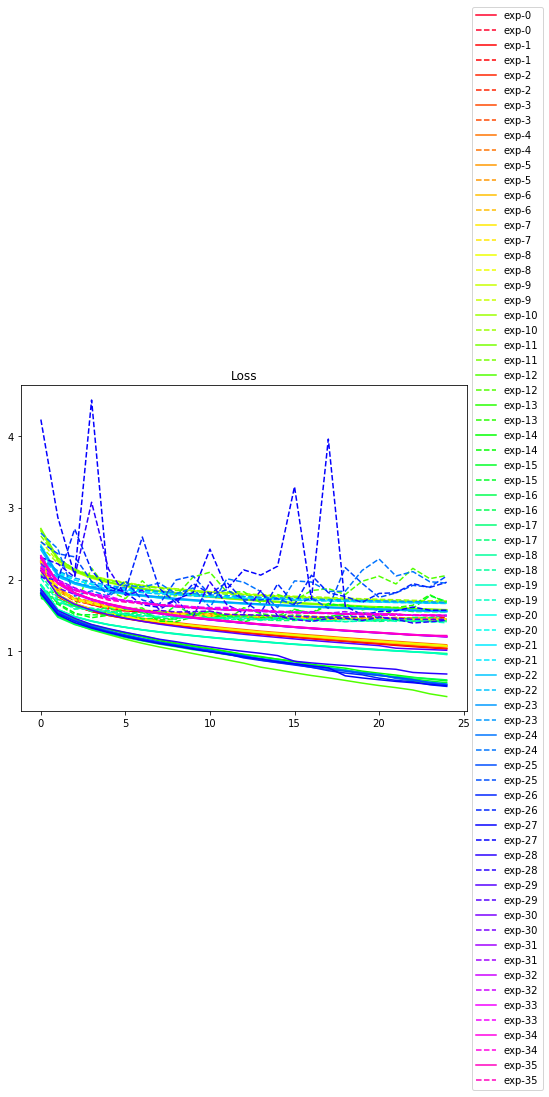

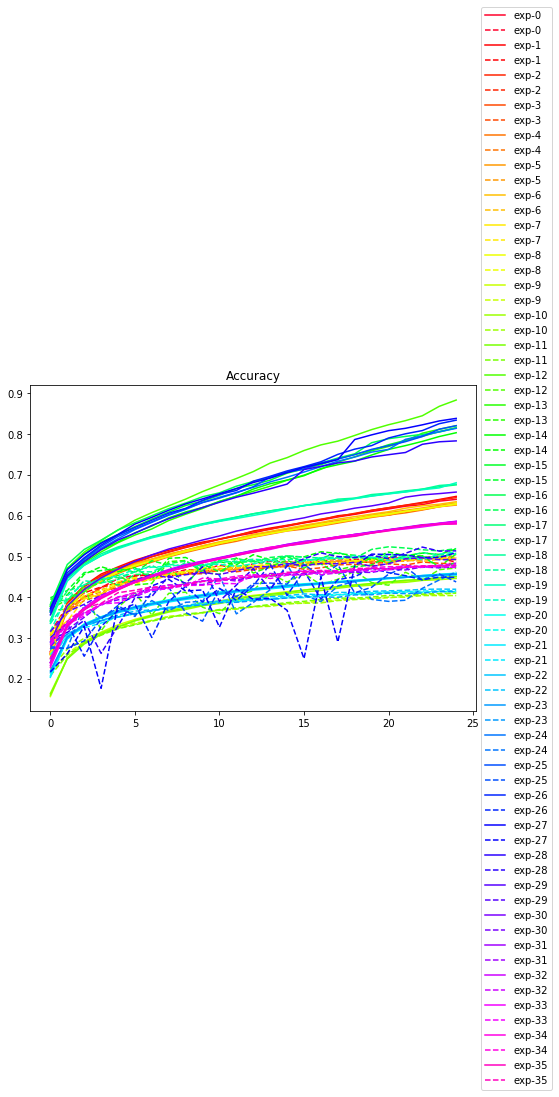

In [11]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()